# 6.2 Exploring relationships

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Import file

df = pd.read_csv(r'/Users/matthewerrington/Downloads/airbnb_jan8b - Sheet1.csv', index_col = False)

In [3]:
df.head()

,search,airbnb-href,rating,reviews,city,price,type,population,michelin,mich_pop
0,Toulon,https://www.airbnb.com/rooms/27745967?adults=2...,NaN,NaN,"Toulon, Provence-Alpes-Côte d'Azur, France",NaN,NaN,171953,NaN,NaN
1,Saint-Étienne,https://www.airbnb.com/rooms/46489673?adults=2...,NaN,NaN,"Saint-Priest-en-Jarez, Auvergne-Rhône-Alpes, F...",NaN,Entire home,172565,NaN,NaN
2,Saint-Étienne,https://www.airbnb.com/rooms/46922331?adults=2...,NaN,NaN,"Saint-Étienne, Auvergne-Rhône-Alpes, France",NaN,Entire home,172565,NaN,NaN
3,Saint-Étienne,https://www.airbnb.com/rooms/46095645?adults=2...,NaN,NaN,"Saint-Étienne, Auvergne-Rhône-Alpes, France",NaN,Entire home,172565,NaN,NaN
4,Saint-Étienne,https://www.airbnb.com/rooms/46029264?adults=2...,NaN,NaN,"Saint-Étienne, Auvergne-Rhône-Alpes, France",NaN,Entire home,172565,NaN,NaN


In [5]:
# Create sub set for charting
sub = df[['rating', 'reviews', 'price', 'population', 'michelin', 'mich_pop']]

### 3. Create Correlation Matric Heatmap (colored)

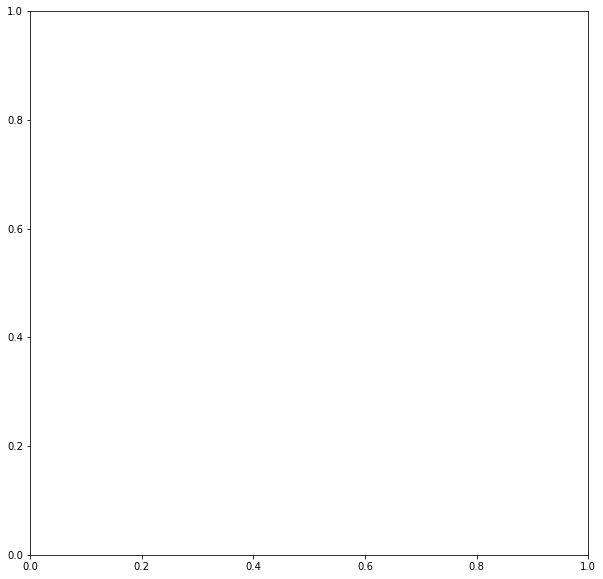

In [6]:
# Create a subplot with matplotlib. 

f,ax = plt.subplots(figsize=(10,10))

In [7]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

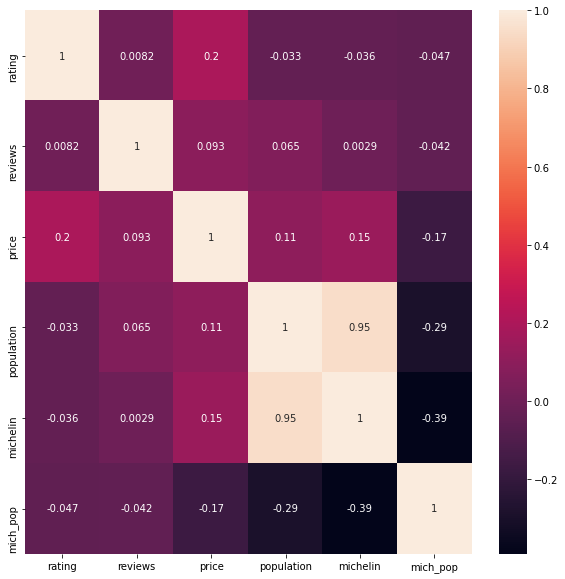

In [8]:
corr.figure

This correlation matrix heatmap would imply that there is little significant relationship between most of the varibles. The number of Michelin restuarants is tied to the size of a city's population - there is a .95 correlation.

### 4. Create a scatterplot for the variables with the strongest correlations.

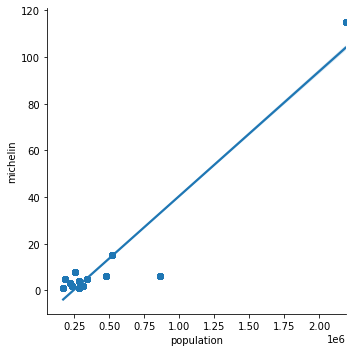

In [10]:
# Create a scatterplot for the population and michelin columns in seaborn

sns.lmplot(x = 'population', y = 'michelin', data = df)

Since there is only one large city and it also includes the largest count of Michelin restaurants, it would be challenging to see if this plays out across the globe or continent. There are several outliers with larger populations but smaller amounts of Michelin restaurants. And there are smaller cities with larger counts of Michelin restaurants.

### 5. Create a pair plot of the entire data set.

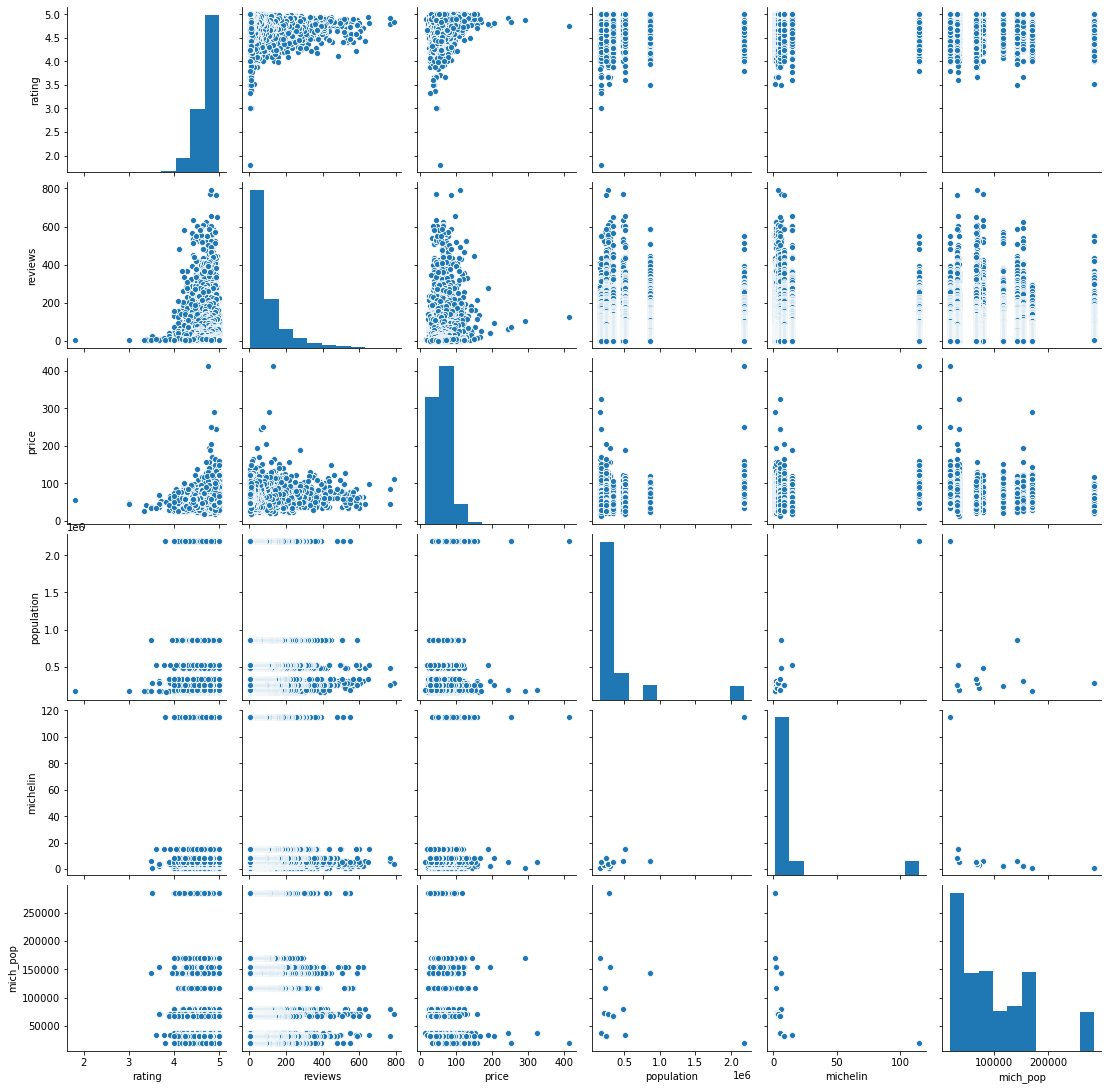

In [11]:
g = sns.pairplot(sub)

An interesting chart to review is ratings/price. There appears to be no average low ratings on properties with higher prices per night. 

The rating average also seems to increase based on the size of the city's population. 

The lower priced rentals seem to have more reviews. 

### 6. Create a categorical plot and interpret the results.

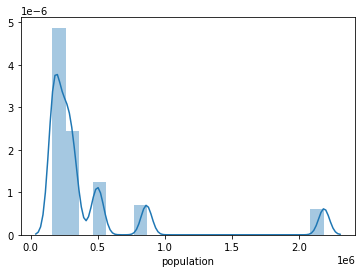

In [14]:
# Use a histogram to visualize the distribution of the variables. 

sns.distplot(df['population'], bins = 20)

In [23]:
df.loc[df['population'] < 200000, 'Population Category'] = 'Low population'

In [24]:
df.loc[(df['population'] >= 200000) & (df['population'] < 1000000), 'Population category'] = 'Middle population'

In [25]:
df.loc[df['population'] >= 1000000, 'Population Category'] = 'High population'

In [26]:
df['Population category'].value_counts(dropna = False)

Middle population    4195
NaN                  2458
Name: Population category, dtype: int64

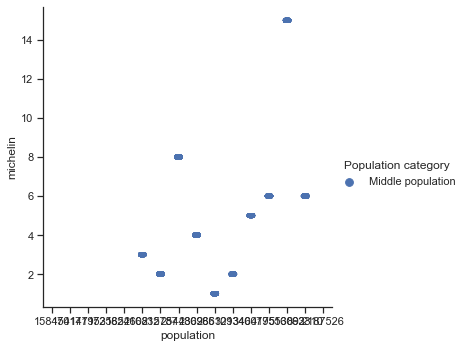

In [27]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="population", y="michelin", hue="Population category", data=df)

Not sure why NaN is showing up under population as checks show all rows have data. All but one city has a population of under 1,000,000 people. In theory, the low category should include the majority of results, then middle, then one at the top. Need to investigage.

### 7. Questions of Data 

Why does there appear to be a higher average rating for larger cities? Is it the quality of the rooms or the allure of the city itself?

Are higher priced rooms less likely to get less reviews because of the cost?

Is there any correlation between size of a city and count of Michelin restaurants? What other factors are involved? 

### 8. Define any hypotheses

A larger population leads to a higher rating.

A lower priced room leads to more reviews.

The smaller cities of France have more Michelin restaurants per person than Paris.